imports

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sys
import math

# Direct Methods for the solution of Linear Systems

In [2]:
def linSystemSolver(A, n):
    x = np.ones((n,1))
    b = np.dot(A,x)
    cond_norm2 = np.linalg.cond(A)
    cond_norminf = np.linalg.cond(A, np.inf)
   
    lu, piv = scipy.linalg.lu_factor(A)
    my_x = scipy.linalg.lu_solve((lu, piv), b)

    rel_error = scipy.linalg.norm(x-my_x) / scipy.linalg.norm(x)

    # print('condition number in 2-norm: ', cond_norm2)
    # print('condition number in inf-norm: ', cond_norminf)
    # print('relative error: ', rel_error)
    
    return cond_norm2, cond_norminf, rel_error

A random matrix, n in {10, 20, ..., 100}

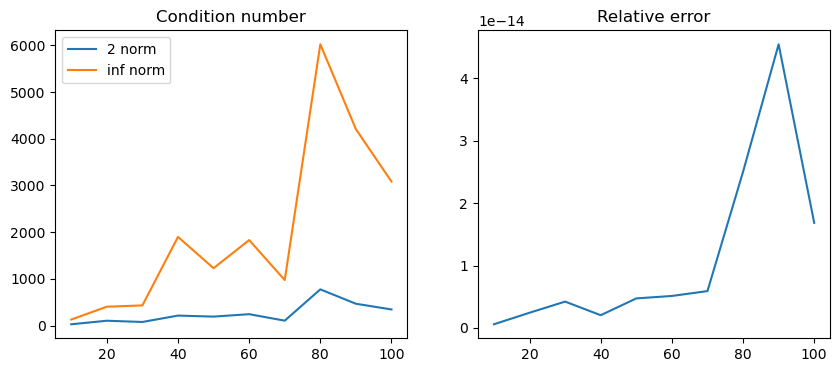

In [6]:
ns = [x for x in range(10, 101, 10)]
cond_norm2s, cond_norminfs, rel_errors = [], [], []

for n in ns:
    A = np.random.randn(n,n)
    a,b,c = linSystemSolver(A, n)
    cond_norm2s.append(a)
    cond_norminfs.append(b)
    rel_errors.append(c)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(ns, cond_norm2s, label="2 norm")
plt.plot(ns, cond_norminfs, label="inf norm")
plt.title("Condition number")
plt.legend()

plt.subplot(1,2,2)
plt.plot(ns, rel_errors)
plt.title("Relative error")
plt.show()

A Vandermonde matrix, n in {5, 10, 15, 20, 25, 30}

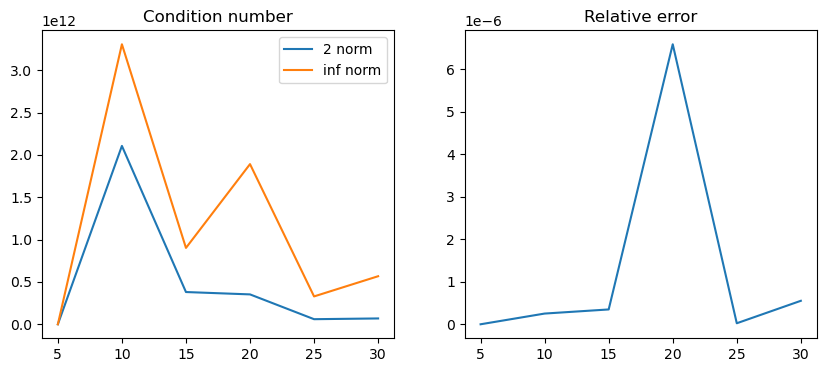

In [4]:
ns = [x for x in range(5, 31, 5)]
cond_norm2s, cond_norminfs, rel_errors = [], [], []

for n in ns:
    v = [x for x in range(1,n+1)]
    A = np.vander(v, n)
    a,b,c = linSystemSolver(A, n)
    cond_norm2s.append(a)
    cond_norminfs.append(b)
    rel_errors.append(c)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(ns, cond_norm2s, label="2 norm")
plt.plot(ns, cond_norminfs, label="inf norm")
plt.title("Condition number")
plt.legend()

plt.subplot(1,2,2)
plt.plot(ns, rel_errors)
plt.title("Relative error")
plt.show()

A Hilbert matrix, n in {4, 5, ..., 12}

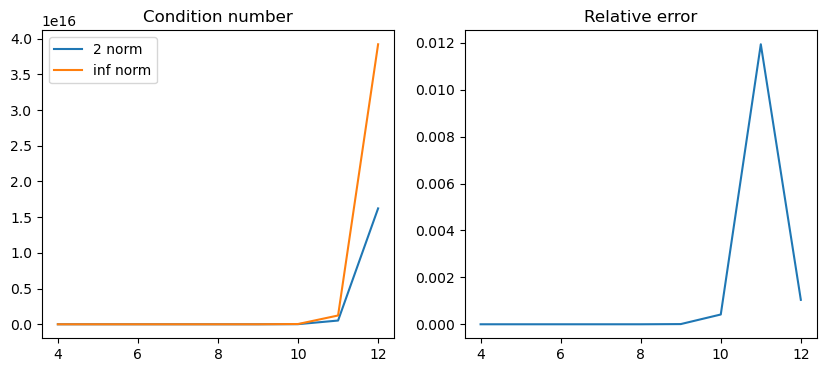

In [5]:
ns = [x for x in range(4, 13)]
cond_norm2s, cond_norminfs, rel_errors = [], [], []

for n in ns:
    A = scipy.linalg.hilbert(n)
    a,b,c = linSystemSolver(A, n)
    cond_norm2s.append(a)
    cond_norminfs.append(b)
    rel_errors.append(c)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(ns, cond_norm2s, label="2 norm")
plt.plot(ns, cond_norminfs, label="inf norm")
plt.title("Condition number")
plt.legend()

plt.subplot(1,2,2)
plt.plot(ns, rel_errors)
plt.title("Relative error")
plt.show()

# Floating point arithmetic

#### Compute ε, the smallest floating point number s.t. fl(1+ε) > 1

In [27]:
# starting from an already small number to speed up the process
eps = 1

while 1+eps > 1:
    eps /= 2
eps *= 2

print(f"epsilon: {eps}")
print(f"1 + epsilon = {eps+1}")
print(f"True epsilon: {sys.float_info.epsilon}")

epsilon: 2.220446049250313e-16
1 + epsilon = 1.0000000000000002
True epsilon: 2.220446049250313e-16


#### We compute the limit of the sequence a(n): (1+ 1/n)^n, for different ns

In [58]:
ns = [1, 10, 100, 1e5, 1e10, 1e15, 1e20, 1e30]
print(f"True e: {math.e}\n")

print("Starting n \t Limit \t\t Distance from e")
print("------------------------------------------------")
for n in ns:
    lim = (1 + 1/n)**n
    print(f"{n:.1e} \t {lim:.4e} \t {abs(lim - math.e):.4e}")

True e: 2.718281828459045

Starting n 	 Limit 		 Distance from e
------------------------------------------------
1.0e+00 	 2.0000e+00 	 7.1828e-01
1.0e+01 	 2.5937e+00 	 1.2454e-01
1.0e+02 	 2.7048e+00 	 1.3468e-02
1.0e+05 	 2.7183e+00 	 1.3591e-05
1.0e+10 	 2.7183e+00 	 2.2478e-07
1.0e+15 	 3.0350e+00 	 3.1675e-01
1.0e+20 	 1.0000e+00 	 1.7183e+00
1.0e+30 	 1.0000e+00 	 1.7183e+00


#### We compute the rank and eigenvals of a matrix and find their relationship

In [59]:

A = np.array([[4, 2],
              [1, 3]])
B = np.array([[4, 2],
              [2, 1]])

rankA = np.linalg.matrix_rank(A)
rankB = np.linalg.matrix_rank(B)
a = np.linalg.eigvals(A)
b = np.linalg.eigvals(B)
eigA = a[a != 0]
eigB = b[b != 0]

print(f"Rank of A: {rankA}")
print(f"Rank of B: {rankB}")
print(f"Eignevalues of A: {eigA}")
print(f"Eignevalues of B: {eigB} (without zeros)")
print(f"Rank of A == len(eig(A)): {rankA == len(eigA)}")
print(f"Rank of B == len(eig(B)): {rankB == len(eigB)}")

Rank of A: 2
Rank of B: 1
Eignevalues of A: [5. 2.]
Eignevalues of B: [5.] (without zeros)
Rank of A == len(eig(A)): True
Rank of B == len(eig(B)): True


==> the number of non-zeros eignevalues is equal to the rank of a given matrix